In [61]:
%matplotlib inline 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
import sklearn

In [62]:
train = pd.read_csv('/Users/jianglongli/Downloads/train_stack')

In [63]:
train['PostCreationDate'] = pd.to_datetime(train.PostCreationDate, infer_datetime_format=True)
train['OwnerCreationDate'] = pd.to_datetime(train.OwnerCreationDate, infer_datetime_format=True)
train['PostClosedDate'] = pd.to_datetime(train.PostClosedDate, infer_datetime_format=True)
train['open_status'] = train.OpenStatus.map(lambda x: 1 if x == "open" else 0)
train['timing'] = (train.PostCreationDate - train.OwnerCreationDate).dt.days
tag_col = ['Tag%d' % i for i in range(1, 6)]
train['tag_num'] = train[tag_col].notnull().sum(axis = 1)
train['title_len'] = train.Title.str.len()
train['body_len'] = train.BodyMarkdown.str.len()
train['title_wc'] = train.Title.map(lambda x: len(x.split(" ")))
train['body_wc'] = train.BodyMarkdown.map(lambda x: len(x.split()))
train['avg_body_word_len'] = train.body_len / train.body_wc
train['avg_title_word_len'] = train.title_len / train.title_wc

In [66]:
train.columns

Index(['PostId', 'PostCreationDate', 'OwnerUserId', 'OwnerCreationDate',
       'ReputationAtPostCreation', 'OwnerUndeletedAnswerCountAtPostTime',
       'Title', 'BodyMarkdown', 'Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5',
       'PostClosedDate', 'OpenStatus', 'open_status', 'timing', 'tag_num',
       'title_len', 'body_len', 'title_wc', 'body_wc', 'avg_body_word_len',
       'avg_title_word_len'],
      dtype='object')

In [67]:
train.shape

(100000, 24)

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
PostId                                 100000 non-null int64
PostCreationDate                       100000 non-null datetime64[ns]
OwnerUserId                            100000 non-null int64
OwnerCreationDate                      100000 non-null datetime64[ns]
ReputationAtPostCreation               100000 non-null int64
OwnerUndeletedAnswerCountAtPostTime    100000 non-null int64
Title                                  100000 non-null object
BodyMarkdown                           100000 non-null object
Tag1                                   99999 non-null object
Tag2                                   80687 non-null object
Tag3                                   54228 non-null object
Tag4                                   28275 non-null object
Tag5                                   11116 non-null object
PostClosedDate                         49921 non-null datetime64[ns]
OpenStat

In [69]:
len(train.OwnerUserId.unique())

72237

In [70]:
train.describe()

,PostId,OwnerUserId,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,open_status,timing,tag_num,title_len,body_len,title_wc,body_wc,avg_body_word_len,avg_title_word_len
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,7.007524e+06,6.513870e+05,506.024570,19.394690,0.500790,215.981670,2.743050,48.183520,860.270560,8.053500,106.505260,7.200809,6.242551
std,3.234181e+06,4.389865e+05,2503.716289,88.593297,0.500002,270.017322,1.259898,20.388723,1538.007039,3.729766,132.517899,3.763400,1.563038
min,1.300000e+01,3.000000e+00,-33.000000,0.000000,0.000000,-1214.000000,0.000000,10.000000,15.000000,1.000000,1.000000,2.251119,2.636364
25%,4.547488e+06,2.678920e+05,1.000000,0.000000,0.000000,7.000000,2.000000,33.000000,270.000000,5.000000,44.000000,5.631986,5.300000
50%,7.433945e+06,6.093910e+05,36.000000,1.000000,1.000000,102.000000,3.000000,45.000000,499.000000,7.000000,76.000000,6.250000,6.000000
75%,9.758988e+06,9.979390e+05,270.000000,9.000000,1.000000,336.000000,4.000000,59.000000,924.000000,10.000000,128.000000,7.764706,6.833333
max,1.175062e+07,1.567070e+06,209631.000000,5772.000000,1.000000,1437.000000,5.000000,250.000000,31673.000000,48.000000,12066.000000,647.727273,72.000000


In [71]:
train[train.OwnerUserId==466534].describe()

,PostId,OwnerUserId,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,open_status,timing,tag_num,title_len,body_len,title_wc,body_wc,avg_body_word_len,avg_title_word_len
count,3.400000e+01,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,5.719266e+06,466534.0,1476.705882,7.205882,0.117647,321.382353,1.558824,29.735294,1716.117647,4.647059,134.441176,11.054804,7.038095
std,3.009805e+06,0.0,836.700175,2.459113,0.327035,282.866712,0.823561,6.720880,1725.712567,1.920896,108.377620,3.819297,2.267327
min,2.896811e+06,466534.0,152.000000,3.000000,0.000000,33.000000,1.000000,18.000000,47.000000,2.000000,10.000000,4.700000,2.833333
25%,3.278592e+06,466534.0,823.750000,5.000000,0.000000,88.250000,1.000000,25.250000,598.250000,3.000000,61.000000,8.599322,5.553571
50%,3.655870e+06,466534.0,1347.500000,7.500000,0.000000,138.500000,1.000000,30.000000,1255.500000,4.000000,117.000000,10.996461,6.450000
75%,8.189580e+06,466534.0,2243.500000,9.750000,0.000000,576.250000,2.000000,34.000000,2310.750000,5.750000,175.250000,13.386505,8.625000
max,1.150694e+07,466534.0,2694.000000,10.000000,1.000000,817.000000,4.000000,42.000000,7672.000000,12.000000,503.000000,21.475610,13.000000


In [72]:
train.groupby('open_status').mean()

,PostId,OwnerUserId,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,timing,tag_num,title_len,body_len,title_wc,body_wc,avg_body_word_len,avg_title_word_len
open_status,,,,,,,,,,,,
0,7.585298e+06,754922.090944,357.595160,13.589391,181.024519,2.613850,45.851285,722.778630,7.806594,93.327477,6.807897,6.121289
1,6.431573e+06,548178.497254,653.985683,25.181673,250.828531,2.871842,50.508397,997.328701,8.299627,119.641466,7.592482,6.363430


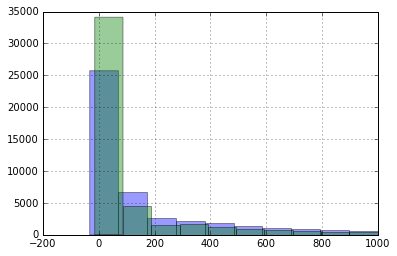

In [73]:
mask = (train.ReputationAtPostCreation < 1000)
train[(train.open_status == 1) & mask].ReputationAtPostCreation.hist(color = 'blue', alpha = .4)
train[(train.open_status == 0) & mask].ReputationAtPostCreation.hist(color = 'green', alpha = .4)

In [74]:
train.head()

,PostId,PostCreationDate,OwnerUserId,OwnerCreationDate,ReputationAtPostCreation,OwnerUndeletedAnswerCountAtPostTime,Title,BodyMarkdown,Tag1,Tag2,...,OpenStatus,open_status,timing,tag_num,title_len,body_len,title_wc,body_wc,avg_body_word_len,avg_title_word_len
0,6046168,2011-05-18 14:14:05,543315,2010-09-17 10:15:06,1,2,For Mongodb is it better to reference an objec...,I am building a corpus of indexed sentences in...,mongodb,NaN,...,open,1,243,1,76,522,15,93,5.612903,5.066667
1,4873911,2011-02-02 11:30:10,465076,2010-10-03 09:30:58,192,24,How to insert schemalocation in a xml document...,i create a xml document with JAXP and search a...,dom,xsd,...,open,1,122,3,54,1023,10,75,13.640000,5.400000
2,3311559,2010-07-22 17:21:54,406143,2010-07-22 16:58:20,1,0,Too many lookup tables,What are the adverse effects of having too man...,sql-server,database-design,...,open,1,0,3,23,194,5,29,6.689655,4.600000
3,9990413,2012-04-03 09:18:39,851755,2011-07-19 10:22:40,4,1,What is this PHP code in VB.net,I am looking for the vb.net equivalent of this...,php,vb.net,...,too localized,0,258,2,31,961,7,88,10.920455,4.428571
4,10421966,2012-05-02 21:25:01,603588,2011-02-04 18:05:34,334,14,Spring-Data mongodb querying multiple classes ...,"With Spring-Data, you can use the @Document an...",mongodb,spring-data,...,open,1,453,2,75,622,10,97,6.412371,7.500000


In [75]:
feat_col = ['ReputationAtPostCreation', 'OwnerUndeletedAnswerCountAtPostTime', 'timing', 'title_len', 
            'body_len', 'tag_num', 'title_wc', 'avg_body_word_len', 'avg_title_word_len']
features = train[feat_col]
labels = train['open_status']

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

In [77]:
feat_train, feat_test, labels_train, labels_test = train_test_split(features, labels, test_size = .2)

In [ ]:
logit = LogisticRegression()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(criterion='gini',n_estimators= 100, warm_start= False)
# model_svc = SVC()
cross_val_score(estimator=forest, cv = 10, X = features, y = labels)


In [80]:
logit.fit(feat_train, labels_train)
labels_pred = logit.predict(feat_test)
forest.fit(feat_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
param_grid = {'n_estimators': [8, 10, 12, 16],
              'criterion': ['gini', 'entropy'],
              'warm_start': [True, False]}
grid = GridSearchCV(estimator = forest, param_grid = param_grid, cv=10)
grid.fit(features, labels)

In [100]:
print("grid search best score: ", grid.best_score_)
print("best parameters: ", grid.best_params_)

grid search best score:  0.63863
best parameters:  {'criterion': 'gini', 'n_estimators': 16, 'warm_start': False}


In [60]:
acc = accuracy_score(labels_test, labels_pred)
print('accuracy: %f' % acc)
print('----------------------------------------------------')
print(classification_report(labels_test, labels_pred))
print('----------------------------------------------------')
print('confusion matrix:')
print(confusion_matrix(labels_test, labels_pred))

accuracy: 0.593600
----------------------------------------------------
             precision    recall  f1-score   support

          0       0.58      0.65      0.61      9966
          1       0.61      0.54      0.57     10034

avg / total       0.59      0.59      0.59     20000

----------------------------------------------------
confusion matrix:
[[6436 3530]
 [4598 5436]]


In [94]:
sorted(list(zip(feat_col, forest.feature_importances_)), key = lambda x: x[1])

[('tag_num', 0.047035383707041523),
 ('title_wc', 0.052169872572005463),
 ('OwnerUndeletedAnswerCountAtPostTime', 0.064914693887442504),
 ('ReputationAtPostCreation', 0.1042180574096107),
 ('title_len', 0.10422667896999693),
 ('avg_title_word_len', 0.11262940230247767),
 ('timing', 0.11670373318698601),
 ('avg_body_word_len', 0.18387142247547991),
 ('body_len', 0.21423075548895931)]

(0, 1500)

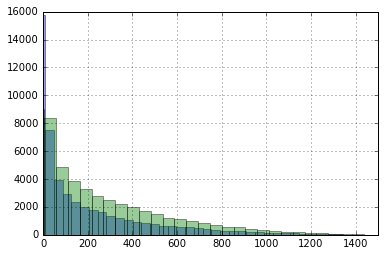

In [25]:
train.groupby('open_status').timing.hist(bins=50, alpha = .4)
plt.xlim(0, 1500)